In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree
import sklearn.metrics
import sklearn.ensemble
import sklearn.preprocessing
import sklearn.model_selection   # For cross_val_score, GridSearchCV, RandomizedSearchCV
import pandas as pd
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
#training as y target values of y = tomororrow_is_buy
data = pd.read_csv('out.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data = data.dropna(axis=1)
X = data.drop(["date","ticker","tomorrw_is_buy","tomorrow_is_strong_buy","week_is_buy","week_is_strong_buy","4week_is_buy","4week_is_strong_buy"],axis=1)
y = data.tomorrw_is_buy
X = X.values
y = y.values
data.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,date,ticker,score_neg,score_neu,score_pos,score_compound,parent_score_neg,parent_score_neu,parent_score_pos,parent_score_compound,...,day_increase,tomorrw_is_buy,tomorrow_is_strong_buy,week_increase,week_is_buy,week_is_strong_buy,4week_is_buy,4week_is_strong_buy,volume,today_close
0,2014-01-02,ago,0.000,0.909,0.091,0.9394,0.045,0.83,0.125,0.9923,...,0.98643,0,0,1.00000,0,0,0,0,53000.78535,20.229889
1,2014-01-02,awre,0.000,0.909,0.091,0.9394,0.045,0.83,0.125,0.9923,...,0.99018,0,0,1.00000,0,0,1,1,3997.22252,4.453092
2,2014-01-02,ago,0.000,0.885,0.115,0.2960,0.045,0.83,0.125,0.9923,...,0.98643,0,0,1.00000,0,0,0,0,53000.78535,20.229889
3,2014-01-02,ago,0.000,0.936,0.064,0.2960,0.045,0.83,0.125,0.9923,...,0.98643,0,0,1.00000,0,0,0,0,53000.78535,20.229889
4,2014-01-02,fund,0.031,0.879,0.089,0.5707,0.045,0.83,0.125,0.9923,...,0.99344,0,0,1.01717,0,0,0,0,8010.22674,4.394382


In [3]:
#split data into 60-20-20
#test set
x_remaining, Xtest, y_remaining, ytest = sklearn.model_selection.train_test_split(X, y, test_size=0.20,
                                                                                  random_state=0)
#validation and training set
Xtrn, Xval, ytrn, yval = sklearn.model_selection.train_test_split(x_remaining, y_remaining, test_size=0.25,
                                                                  random_state=0)
print(Xtrn.shape,Xval.shape,ytrn.shape,yval.shape)

(240956, 20) (80319, 20) (240956,) (80319,)


In [4]:
#scaling values 
scaler = sklearn.preprocessing.StandardScaler()
X_trn = scaler.fit_transform(Xtrn.reshape(Xtrn.shape[0],-1))
X_test = scaler.transform(Xtest.reshape(Xtest.shape[0],-1))
X_val = scaler.transform(Xval.reshape(Xval.shape[0],-1))

In [5]:
def plot_grid_search(grid,title):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """  
    #makes sure the x axis points are evenly spaced
    train_score = grid.cv_results_['mean_train_score']
    test_score = grid.cv_results_['mean_test_score']
    plt.plot(train_score,'-ok',color='green',label="train = %.3f" %(max(train_score)))
    plt.plot(test_score,linestyle='dotted',color='black',label="test = %.3f" %(max(test_score)))
    locs, labels = plt.xticks()
#     plt.xticks(locs,grid.cv_results_['params'],rotation="vertical")
    plt.xticks()
    plt.legend(loc="upper left")
    plt.xlabel("estimator")
    plt.ylabel("mean_score")
    plt.title(f'{title} score vs estimators')
    

In [16]:
%%time
tree = sklearn.tree.DecisionTreeClassifier(random_state=0)
tree_param = {'criterion':['gini','entropy'],'max_depth':[1, 5, 10, 20, 50, 100]}
tree_estimator = sklearn.model_selection.GridSearchCV(tree,param_grid=tree_param,cv=5,return_train_score=True)
tree_estimator.fit(X_trn,ytrn)

print(f"best score: {tree_estimator.best_score_}")
print(f"best estimator: {tree_estimator.best_estimator_}")
print(f"best parameter: {tree_estimator.best_params_}")

best score: 0.9418607498512654
best estimator: DecisionTreeClassifier(max_depth=20, random_state=0)
best parameter: {'criterion': 'gini', 'max_depth': 20}
CPU times: user 7min 7s, sys: 5.05 s, total: 7min 12s
Wall time: 8min 24s


CPU times: user 64.7 ms, sys: 48.1 ms, total: 113 ms
Wall time: 144 ms


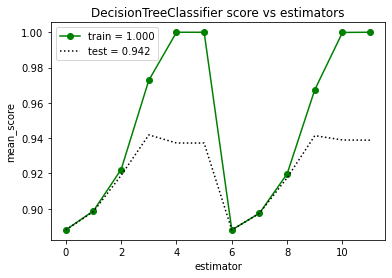

In [27]:
%%time
plot_grid_search(tree_estimator,"DecisionTreeClassifier")

In [28]:
%%time
forest = sklearn.ensemble.RandomForestClassifier(random_state=0)
forest_param = {'n_estimators':[1, 2, 4, 6, 8, 10],'max_depth':[1, 5, 10, 20, 50, 100]}
forest_estimator = sklearn.model_selection.GridSearchCV(forest,param_grid=forest_param,cv=5,return_train_score=True)
forest_estimator.fit(X_trn,ytrn)
print(f"best score: {forest_estimator.best_score_}")
print(f"best estimator: {forest_estimator.best_estimator_}")
print(f"best parameter: {forest_estimator.best_params_}")

best score: 0.9340169975028537
best estimator: RandomForestClassifier(max_depth=100, n_estimators=10, random_state=0)
best parameter: {'max_depth': 100, 'n_estimators': 10}
CPU times: user 15min 23s, sys: 16.4 s, total: 15min 39s
Wall time: 17min 34s


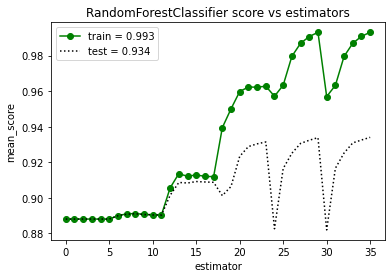

In [29]:
plot_grid_search(forest_estimator,"RandomForestClassifier")

In [6]:
%%time
log = sklearn.linear_model.LogisticRegression(random_state=0,max_iter=1000)
log_param = {'C':[1e-05, 0.0001, 0.001, 0.01, 0.1,1.0]}
log_estimator = sklearn.model_selection.GridSearchCV(log,param_grid=log_param,cv=5,return_train_score=True)
log_estimator.fit(X_trn,ytrn)

print(f"best score: {log_estimator.best_score_}")
print(f"best estimator: {log_estimator.best_estimator_}")
print(f"best parameter: {log_estimator.best_params_}")

best score: 0.8892577898135416
best estimator: LogisticRegression(C=0.0001, max_iter=1000, random_state=0)
best parameter: {'C': 0.0001}
CPU times: user 29.8 s, sys: 2.08 s, total: 31.8 s
Wall time: 26 s


Text(0.5, 1.0, 'LogisticRegression score vs estimator')

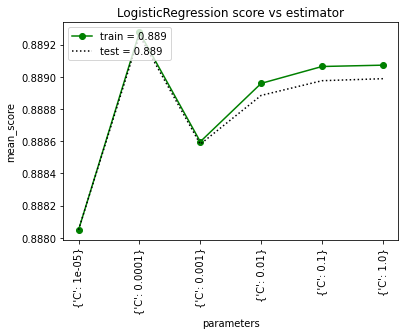

In [15]:
# plot_grid_search(log_estimator,"LogisticRegression")
train_score = log_estimator.cv_results_['mean_train_score']
test_score = log_estimator.cv_results_['mean_test_score']
locs, labels = plt.xticks()
plt.plot(locs,train_score,'-ok',color='green',label="train = %.3f" %(max(train_score)))
plt.plot(locs,test_score,linestyle='dotted',color='black',label="test = %.3f" %(max(test_score)))
plt.xticks(locs,log_estimator.cv_results_['params'],rotation="vertical")
plt.legend(loc="upper left")
plt.xlabel("estimators")
plt.ylabel("mean_score")
plt.title(f'{"LogisticRegression"} score vs estimator')

In [ ]:
%%time
svm = sklearn.svm.SVC(random_state=0)
svm_param = {'C':[0.001, 0.01, 0.1,1.0], 'gamma':[0.01, 0.1, 1, 10], 'kernel':['linear','poly','rbf']}
svm_estimator = sklearn.model_selection.GridSearchCV(svm,param_grid=svm_param,cv=5)
svm_estimator.fit(X_trn,ytrn)
print(f"best score: {svm_estimator.best_score_}")
print(f"best estimator: {svm_estimator.best_estimator_}")
print(f"best parameter: {svm_estimator.best_params_}")